In [2567]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2568]:
path_df = "/home/taiel/Documentos/FIUBA/2024_C1/OrgaDeDatos/7506R-1C2024-GRUPO01/TP1/properati_argentina_2021.csv"

In [2569]:
df = pd.read_csv(path_df)

In [2570]:
df.shape

(460154, 20)

In [2571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [2572]:
df.head(3)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay


In [2573]:
df.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64

## Análisis exploratorio

Arrancamos filtrando el df segun lo que indica la consigna.

In [2574]:
df["property_currency"].value_counts()

property_currency
USD    349104
ARS     88869
UYU      3506
PEN        99
COP        12
Name: count, dtype: int64

In [2575]:
df["operation"].value_counts()

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

In [2576]:
df["property_type"].value_counts()

property_type
Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: count, dtype: int64

In [2577]:
tipos_propiedades = ["Departamento", "Casa", "PH"]

In [2578]:
df["place_l2"].value_counts()

place_l2
Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La Pampa                           783
Canelones                          744
Chubut                             701
San Luis                           677
Misiones                           529
Florida                            411
Jujuy                              406
Corrientes      

In [2579]:
df = df[(df["property_currency"] == "USD") & (df["operation"] == "Venta") & (df["property_type"].isin(tipos_propiedades)) & 
        (df["place_l2"] == "Capital Federal")]

In [2580]:
# que pasa aca con aquellas que tengan nan de place_l2 pero que realmente esten en capital federal
# TODO: deberia buscar puntos extremos de CABA y ahi filtrar por eso tambien

### a) Exploración incial

Variables cuantitativas

In [2581]:
df["start_date"].min()

'2021-01-01'

In [2582]:
df["start_date"].max()

'2021-12-31'

In [2583]:
df["end_date"].min()

'2021-01-02'

In [2584]:
df["end_date"].max()

'9999-12-31'

In [2585]:
df["created_on"].min()

'2021-01-01'

In [2586]:
df["created_on"].max()

'2021-12-31'

Veo que de **end_date** a ciertas propiedades le colocaron el año 9999, por lo que interpreto que todavia no habian sido vendidas al momento de recolectar los datos.

Estas tres columnas veo que son variables cuantitativas discretas, ya que solo estan las fechas como tal, no hay dato sobre las horas.

Tanto **latitud** como **longitud** son variables cuantitativas continuas.

In [2587]:
df["latitud"].mean(), df["latitud"].median(), df["latitud"].mode()[0]

(-34.59148102467374, -34.5957896, -34.5412501)

In [2588]:
df["longitud"].mean(), df["longitud"].median(), df["longitud"].mode()[0]

(-58.449794544855415, -58.4390004, -58.4729664)

Los distintos **place_l** son variables cualitativas. Busco los distintos valores que adoptan

In [2589]:
df["place_l2"].value_counts()

place_l2
Capital Federal    94249
Name: count, dtype: int64

In [2590]:
df["place_l3"].value_counts()

place_l3
Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
V

In [2591]:
df["place_l4"].value_counts()

place_l4
Palermo Hollywood    1576
Palermo Chico        1092
Palermo Soho          804
Palermo Viejo         171
Name: count, dtype: int64

In [2592]:
df["place_l5"].value_counts()

Series([], Name: count, dtype: int64)

De la columna **place_l6** ni siquiera miramos porque el resultado de value_counts() con todo el df sin filtrarson todos nulos.

In [2593]:
df["operation"].value_counts()

operation
Venta    94249
Name: count, dtype: int64

**Operation** originalmente es una variable de tipo cualitativa, y vemos que sus valores difieren de lo que son exclusivamente ventas de propiedades, asique nos preguntamos aqui si dichas filas con propiedades a alquilar nos van a servir para predecir el valor de una propiedad en venta.
En nuestro caso ya filtrado solo van a estar aquellas propiedades que tienen el valor de "Venta".

In [2594]:
df["property_type"].value_counts()

property_type
Departamento    80829
PH               9266
Casa             4154
Name: count, dtype: int64

**property_type** originalmente es una variable de tipo cualitativa también, y vemos que los posibles valores difieren de edifcios, hoteles o establecimientos masivos (exceptuando las oficinas quizas), aunque propiedades de este tipo pueden estar agrupadas en Otro, asique es algo que tendremos en cuenta de aqui en adelante.
Idem lo dicho anteriormente, la variable con el filtrado previo solo va a variar entre las opciones anteriores.

In [2595]:
df["property_rooms"].value_counts()

property_rooms
3.0     26714
2.0     26496
4.0     16405
1.0     15084
5.0      5171
6.0      1854
7.0       741
8.0       359
9.0       151
10.0      107
11.0       33
12.0       30
14.0       17
15.0       12
13.0        6
16.0        4
17.0        4
18.0        3
20.0        3
30.0        2
36.0        2
19.0        2
35.0        1
32.0        1
24.0        1
40.0        1
28.0        1
Name: count, dtype: int64

In [2596]:
def check_values(column):
    result = []
    for n in column:
        if not np.isnan(n) and n % 1 != 0:
            result.append(n)
    return result

In [2597]:
check_values(df["property_rooms"])

[]

In [2598]:
df["property_rooms"].mean(), df["property_rooms"].median(), df["property_rooms"].mode()[0]

(2.8227992060511777, 3.0, 3.0)

In [2599]:
df["property_bedrooms"].value_counts()

property_bedrooms
 1.0     31947
 2.0     27414
 3.0     17656
 4.0      4797
 5.0       928
 6.0       241
 7.0       107
 8.0        55
 10.0       27
 9.0        27
 12.0       16
 11.0        7
 16.0        6
 14.0        5
 17.0        5
 15.0        4
 18.0        4
 20.0        4
 13.0        4
 32.0        3
 22.0        2
 30.0        1
 70.0        1
-1.0         1
Name: count, dtype: int64

In [2600]:
check_values(df["property_bedrooms"])

[]

In [2601]:
df["property_bedrooms"].mean(), df["property_bedrooms"].median(), df["property_bedrooms"].mode()[0]

(2.0146285220148448, 2.0, 1.0)

Tanto **property_rooms** como **property_bedrooms** vemos que son variables cuantitativas discretas, pero ya observamos que tiene algunos valores extraños (el -3, y aquellos que son muy altos, que pueden llegar a ser hoteles o similar, pero nuevamente, lo analizaremos mas adelante).

In [2602]:
df["property_surface_covered"].value_counts()

property_surface_covered
40.0        2394
38.0        2020
50.0        2011
45.0        1946
35.0        1853
            ... 
217000.0       1
40038.0        1
598.0          1
795.0          1
5970.0         1
Name: count, Length: 590, dtype: int64

In [2603]:
check_values(df["property_surface_covered"])

[]

In [2604]:
df["property_surface_covered"].mean(), df["property_surface_covered"].median(), df["property_surface_covered"].mode()[0]

(87.93193244952968, 58.0, 40.0)

In [2605]:
df["property_surface_total"].value_counts()

property_surface_total
50.0      1799
40.0      1725
45.0      1586
42.0      1561
60.0      1506
          ... 
713.0        1
661.0        1
834.0        1
684.0        1
7720.0       1
Name: count, Length: 719, dtype: int64

In [2606]:
check_values(df["property_surface_total"])

[]

In [2607]:
df["property_surface_total"].mean(), df["property_surface_total"].median(), df["property_surface_total"].mode()[0]

(109.09297019182372, 65.0, 50.0)

Ambas variables indicadoras de la superficie de las propiedades (totales y cubiertas) son variables cuantitativas continuas, y vemos que hay discrepancia en los datos ya que superficie total = superficie cubierta + superficie descubierta, y el promedio de las superficie cubierta es 9000 aproximadamente, y el de la superficie total es 420 aproximadamente.

In [2608]:
# o discretas?

In [2609]:
df["property_price"].value_counts()

property_price
110000.0    1514
120000.0    1426
85000.0     1412
125000.0    1396
115000.0    1377
            ... 
98046.0        1
110148.0       1
149010.0       1
102004.0       1
302000.0       1
Name: count, Length: 4789, dtype: int64

In [2610]:
check_values(df["property_price"])

[]

In [2611]:
df["property_price"].mean(), df["property_price"].median(), df["property_price"].mode()[0]

(226238.20718522213, 143900.0, 110000.0)

El **property_price** es una variable cuantitativa discreta.

In [2612]:
df["property_currency"].value_counts()

property_currency
USD    94249
Name: count, dtype: int64

**property_currency** originalmente es una variable cuantitativa tambien, y es la moneda en la que esta publicada la propiedad, asique ya sabemos que vamos a tener que traducir ciertas monedas a USD (o mismo ver si realmente pertenecen a la Argentina las propiedades del df).
Tras el filtrado solo tenemos aquellas propiedades publicadas con valor en USD.

In [2613]:
df["property_title"].value_counts()

property_title
Departamento - Palermo                                                                                  1468
Departamento - Recoleta                                                                                 1324
Departamento - Belgrano                                                                                 1113
Departamento - Caballito                                                                                 936
Departamento - Almagro                                                                                   666
                                                                                                        ... 
Gran 3 ambientes en pleno Villa del Parque                                                                 1
Venta PH 3 Amb Con Patio Flores                                                                            1
Venta, PH, 3 Ambientes, PB, Quincho, Parrilla, Terraza, Paternal                                           1
Vent

El **property_title** es una variable cuantitativa.

### Resumen de esta sección

Creemos que las variables que refieren a los ids, a las fechas, y al titulo de la propiedad, no van a servir para entrenar al modelo, aquellas filas que refieran a propiedades en alquiler tampoco creemos que vayan a servirle al modelo, y por lo tanto ....

Realizando algunos graficos de lo que vemos mas importante ahora

In [2614]:
sns.pairplot(df[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2431361293.py, line 1)

## Visualizaciones

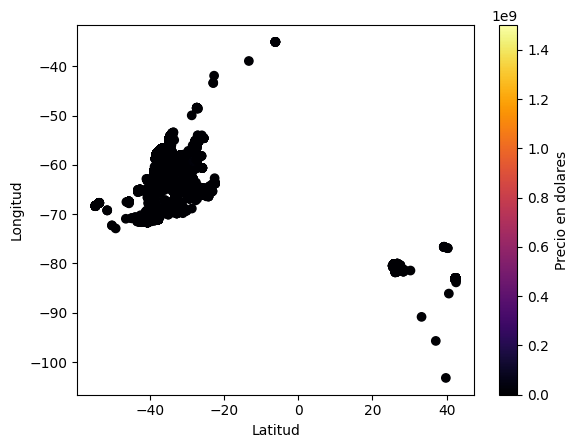

In [ ]:
plt.scatter(df["latitud"], df["longitud"], c = df["property_price"], cmap="inferno")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.colorbar(label="Precio en dolares")

#cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{np.exp(x):.0f}"))
plt.show()

## Datos faltantes

Veo que en place_l6 literalmente **todas** las filas tienen valor NaN

In [ ]:
df = df.drop("place_l6", axis=1)

Me fijo si todas las propiedades del dataset corresponden a casas en venta

In [ ]:
df["operation"].value_counts()

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

Aquellos valores que no son de venta deberia descartarlos ? (yo creeria que si)

In [ ]:
df = df[~df["operation"].isin(["Alquiler", "Alquiler temporal"])]

In [ ]:
df.shape

(337874, 19)

In [ ]:
df[df["property_price"] <= 0].shape

(460, 19)

In [ ]:
df = df[df["property_price"] > 0]

In [ ]:
df.shape

(323821, 19)

In [ ]:
df.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      27814
longitud                     27814
place_l2                         0
place_l3                     14058
place_l4                    224389
place_l5                    322385
operation                        0
property_type                    0
property_rooms               60795
property_bedrooms            74707
property_surface_total       38372
property_surface_covered     22431
property_price                   0
property_currency                0
property_title                   0
dtype: int64

In [ ]:
df[df["property_rooms"].isnull() & df["property_bedrooms"].isnull()].shape[0]

44282

In [ ]:
df[df["property_rooms"].isnull() & ~df["property_bedrooms"].isnull()].shape[0]

16513

Completo aquellas filas que no tengan la cantidad de cuartos totales, pero si la cantidad de habitaciones, con cantHabitaciones + 1, ya que necesariamente tienen un ambiente más.

In [ ]:
df["property_rooms"].fillna(df["property_bedrooms"] + 1, inplace=True)

In [ ]:
df[df["property_surface_total"].isnull() & df["property_surface_covered"].isnull()].shape[0]

0

Completo aquellas filas que no tengan la cantidad superficie total, pero si la superficie cubierta, con la misma cantidad de superficie cubierta.

In [ ]:
df[df["property_surface_total"].isnull() & ~df["property_surface_covered"].isnull()].shape[0]

38372

In [ ]:
df["property_surface_total"].fillna(df["property_surface_covered"], inplace=True)

In [ ]:
df.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      27814
longitud                     27814
place_l2                         0
place_l3                     14058
place_l4                    224389
place_l5                    322385
operation                        0
property_type                    0
property_rooms               44282
property_bedrooms            74707
property_surface_total           0
property_surface_covered     22431
property_price                   0
property_currency                0
property_title                   0
dtype: int64

In [ ]:
df[~df["latitud"].isnull() & ~df["longitud"].isnull() & df["place_l2"].isnull()].shape[0]

0

In [ ]:
df[df["latitud"].isnull() & df["longitud"].isnull() & ~df["place_l2"].isnull()].shape[0]

27814

podriamos hacer aca lo de buscar el centro de los place_l2

In [ ]:
df[df["latitud"].isnull() & df["longitud"].isnull()].shape[0]

27814

De la pagina del gobierno argentino (www.argentina.gob.ar) extraigo los datos de los puntos extremos del pais.

- Norte: Confluencia de los ríos Grande de San Juan y Mojinete, Provincia de Jujuy (Latitud 21º 46' 52" S; Longitud 66º 13' 17" O).
- Sur: Cabo San Pío en la isla Grande de Tierra del Fuego, Provincia de Tierra del Fuego, Antártida e Islas del Atlántico Sur (Latitud 55º 03' 21" S; Longitud 66º 31' 25" O).
- Este: Hito V (CONALI), punto situado en la localidad de Bernardo de Irigoyen, Provincia de Misiones (Latitud 26º 14' 59" S; Longitud 53º 38' 15" O).
- Oeste: Punto ubicado en el Parque Nacional Los Glaciares, Provincia de Santa Cruz (Latitud 50º 01’ S; Longitud 73º 34' O).

Creo una funcion que dadas las coordenadas en grados, minutos y segundos y el punto cardinal, lo transforma a coordenadas de tipo decimal, que es como estan dadas en este dataframe

In [ ]:
def transformar_entrada(coord):
    num, valor = coord[0], coord[1]
    grados, minutos, segundos = num[0], num[1], num[2]
    return grados, minutos, segundos, valor

def transformar_a_decimales(coord):
    g, m, s = coord[0][0], coord[0][1], coord[0][2]
    result = g + m/60 + s/3600
    return result

def transformar_latitud(coord):
    result = transformar_a_decimales(coord)
    if coord[-1] == "N":
        return result
    else:
        return -result

def transformar_longitud(coord):
    result = transformar_a_decimales(coord)
    if coord[-1] == "E":
        return result
    else:
        return -result

In [ ]:
_EXTREMO_NORTE = [[21, 46, 52], "S"]
_EXTREMO_SUR = [[55, 3, 21], "S"]
_EXTREMO_ESTE = [[53, 38, 15], "O"]
_EXTREMO_OESTE = [[73, 34, 0], "O"]

In [ ]:
EXTREMO_NORTE = transformar_latitud(_EXTREMO_NORTE)
EXTREMO_SUR = transformar_latitud(_EXTREMO_SUR)
EXTREMO_ESTE = transformar_longitud(_EXTREMO_ESTE)
EXTREMO_OESTE = transformar_longitud(_EXTREMO_OESTE)

In [ ]:
df[(df["latitud"] > EXTREMO_NORTE) | (df["latitud"] < EXTREMO_SUR)]["place_l2"].value_counts()

place_l2
Florida                362
Michigan               243
Rio Grande do Norte      8
Maryland                 8
Pennsylvania             3
Rio de Janeiro           1
Miami                    1
Name: count, dtype: int64

In [ ]:
EXTREMO_ESTE

-53.6375

In [ ]:
df[(df["longitud"] < EXTREMO_OESTE) | (df["longitud"] > EXTREMO_ESTE)]["place_l2"].value_counts()

place_l2
Florida                362
Michigan               243
Santa Catarina          22
Rocha                   10
Rio Grande do Norte      8
Maryland                 8
Rio de Janeiro           3
Pennsylvania             3
São Paulo                1
Miami                    1
Name: count, dtype: int64

In [ ]:
df = df[(df["latitud"] <= EXTREMO_NORTE) & (df["latitud"] >= 
                                            EXTREMO_SUR) & (df["longitud"] >= EXTREMO_OESTE) & (df["longitud"] <= EXTREMO_ESTE)]

## Valores atípicos

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27c19ec490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27c19ed8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27c8f3b990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27c19ee710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27c19ed5d0>],
 'means': []}

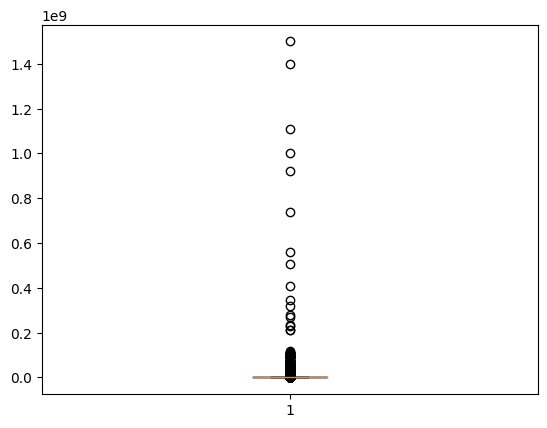

In [ ]:
plt.boxplot(df["property_price"])

In [ ]:
df[(df["property_currency"] == "UYU") | (df["property_currency"] == "COP")].head(3)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
5813,h4JpSCzmTUkYFivMLsN6/Q==,2021-10-29,2022-01-27,2021-10-29,-26.791467,-65.250933,Tucumán,San Miguel de Tucumán,NaN,NaN,Venta,Casa,4.0,3.0,170.0,170.0,1.666000e+07,UYU,Casa - Congreso
22257,Ka5PTII4/Q6xbiefOf0FKQ==,2021-10-01,2021-10-05,2021-10-01,-27.822409,-64.249085,Santiago Del Estero,Santiago del Estero,NaN,NaN,Venta,Casa,4.0,NaN,93.0,93.0,3.180000e+08,COP,Casa en venta we 93 m2 . En Santa Lucia. Medel...
63897,hfdYXRPi3PdEH6RYC2JOAA==,2021-06-22,2021-07-03,2021-06-22,-34.930585,-58.018453,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,Venta,Departamento,4.0,NaN,269.0,269.0,1.400000e+09,COP,"Apartamento Sierras del Moral, 269m2 independi..."


que deberiamos hacer con estas monedas? buscar valores promedios en usd para ese año?

In [ ]:
VALOR_COL_PROM_EN_USD_2021 = 0.0002674 # https://www.exchange-rates.org/es/historial/cop-usd-2021
VALOR_UYU_PROM_EN_USD_2021 = 0.02296 # https://www.exchange-rates.org/es/historial/uyu-usd-2021
VALOR_ARS_PROM_EN_USD_2021 = 0.01054 # https://www.exchange-rates.org/es/historial/ars-usd-2021

In [ ]:
df.loc[df["property_currency"] == "COP", "property_price"] = df["property_price"] * VALOR_COL_PROM_EN_USD_2021
df.loc[df["property_currency"] == "ARS", "property_price"] = df["property_price"] * VALOR_ARS_PROM_EN_USD_2021
df.loc[df["property_currency"] == "UYU", "property_price"] = df["property_price"] * VALOR_UYU_PROM_EN_USD_2021

In [ ]:
df["property_currency"] = "USD"

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27c1a58d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27c1a5a650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27c1a4bfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27c1a5bbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27c1864750>],
 'means': []}

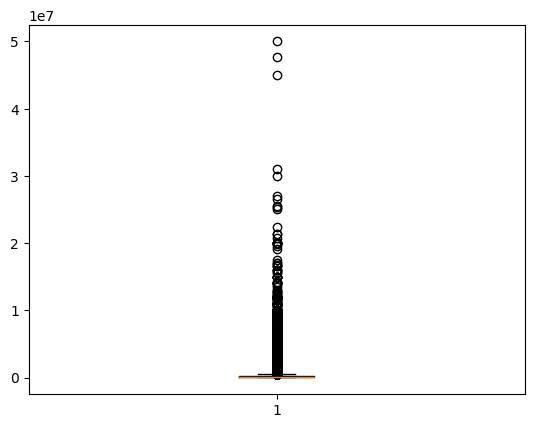

In [ ]:
plt.boxplot(df["property_price"])